Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [308]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/03_Classification'
except ImportError as e:
    pass

## Exercise 3: Classification

### 3.1. Should we play golf?
The Golf data set models different aspects of the weather (outlook, temperature, humidity, forecast) that are relevant for deciding whether one should play golf or not.

In [323]:
# load golf.csv
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

golf = pd.read_csv('golf.csv')
golf = golf.copy()
golf.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


#### 3.1.1 Learn a decision tree model from the Golf data set. Use this model to classify the examples in the Golf-Testset. 

- Think about ways how you can evaluate the performance of your model. 
- Which measures can be calculated from the resulting dataset?

In [324]:
# remove the target variable from the dataframe and encode it
X = golf.drop('Play', axis=1)
y = golf.pop('Play')


from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = pd.DataFrame({'Play': y_encoded})


# encode the categorical attributes 'Outlook' and 'Wind'
from sklearn import preprocessing

OH_encoder = preprocessing.OneHotEncoder()
golf_encoded = OH_encoder.fit_transform(golf[['Outlook','Wind']]).toarray()
golf_encoded = pd.DataFrame(golf_encoded, columns = OH_encoder.get_feature_names_out(['Outlook','Wind']))

X = pd.concat([X,golf_encoded],axis= 1)


X = X.drop(['Outlook','Wind'],axis=1)
# display(X)
# display(y)




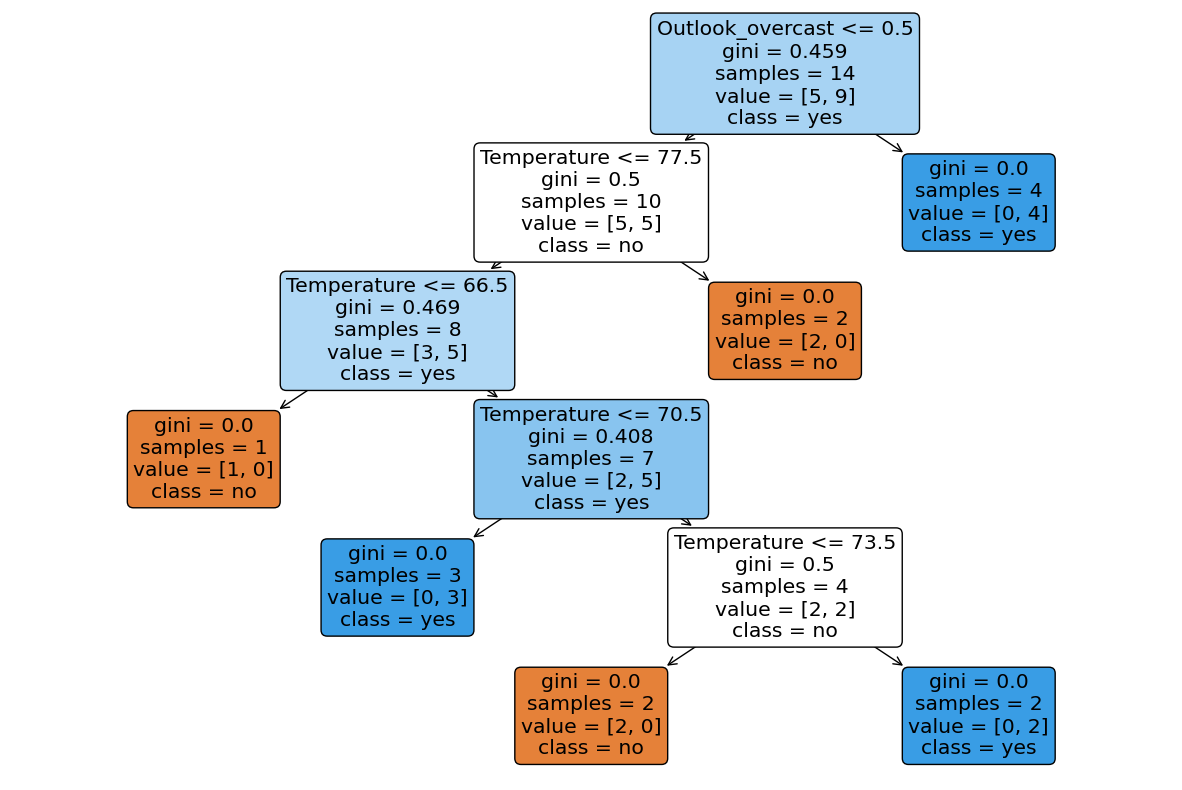

In [325]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Learn a decision tree
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.show()


In [326]:
# load the test set and apply the same preprocessing as for the training set


golf_test = pd.read_csv('golf_testset.csv')


# Preprocessing the test set 
X_test = golf_test.drop('Play', axis = 1)
y_test = golf_test.pop('Play')

#Encoding 
y_test_encoded = label_encoder.fit_transform(y_test)
y_test = pd.DataFrame({'Play': y_test_encoded})

X_test_encoded = OH_encoder.fit_transform(X_test[['Outlook','Wind']]).toarray()
X_test = pd.DataFrame(X_test_encoded, columns = OH_encoder.get_feature_names_out(['Outlook','Wind']))
X_test = pd.concat([golf_test, X_test], axis=1)
X_test = X_test.drop(['Outlook','Wind'], axis=1)

# display(X_test)
# display(y_test)



In [327]:
# apply the model and compare the predictions to the actual values of the target variable
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6428571428571429

#### 3.1.2 Evaluate the performance of your model.
- by calling confusion_matrix and accuracy_score
- examine the confusion matrix. What is the accuracy of your classifier?

In [328]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

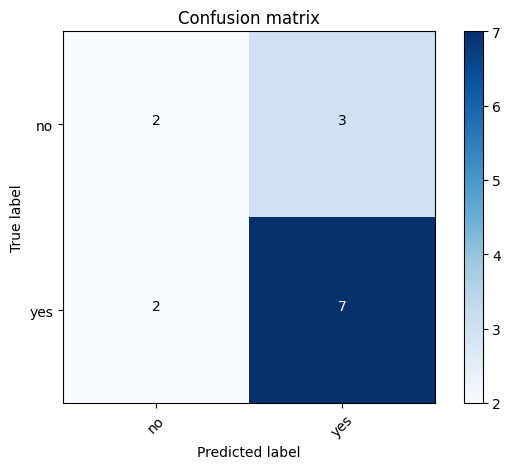

In [329]:
# create the confusion matrix and visualise it

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_matrix, classes=label_encoder.classes_)
# calculate the accuracy of your classifier


#### 3.1.3 Does a k-nearest-neighbor classifier work better for this task? 
- Check how the accuracy of your classifier changes to find out. 
- Do different values of k improve the performance?

In [341]:
# learn KNN classifiers for different values of K and compare their accuracy
from sklearn.neighbors import KNeighborsClassifier

knn_accuracy = []
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)

    print("k = {} , knn_accuracy: {}".format(k,round(accuracy_score(y_test, y_pred),2)))

k = 1 , knn_accuracy: 0.71
k = 2 , knn_accuracy: 0.36
k = 3 , knn_accuracy: 0.64
k = 4 , knn_accuracy: 0.57


### 3.2. Learning a classifier for the Iris Data Set
You want to learn and evaluate a classifier for recognizing different types of Iris flowers.

#### 3.2.1 Let’s try the decision tree classifier first. 
Create a train/test split (with function train_test_split) with 30% test size and stratified sampling.  Evaluate the accuracy of the learned model.

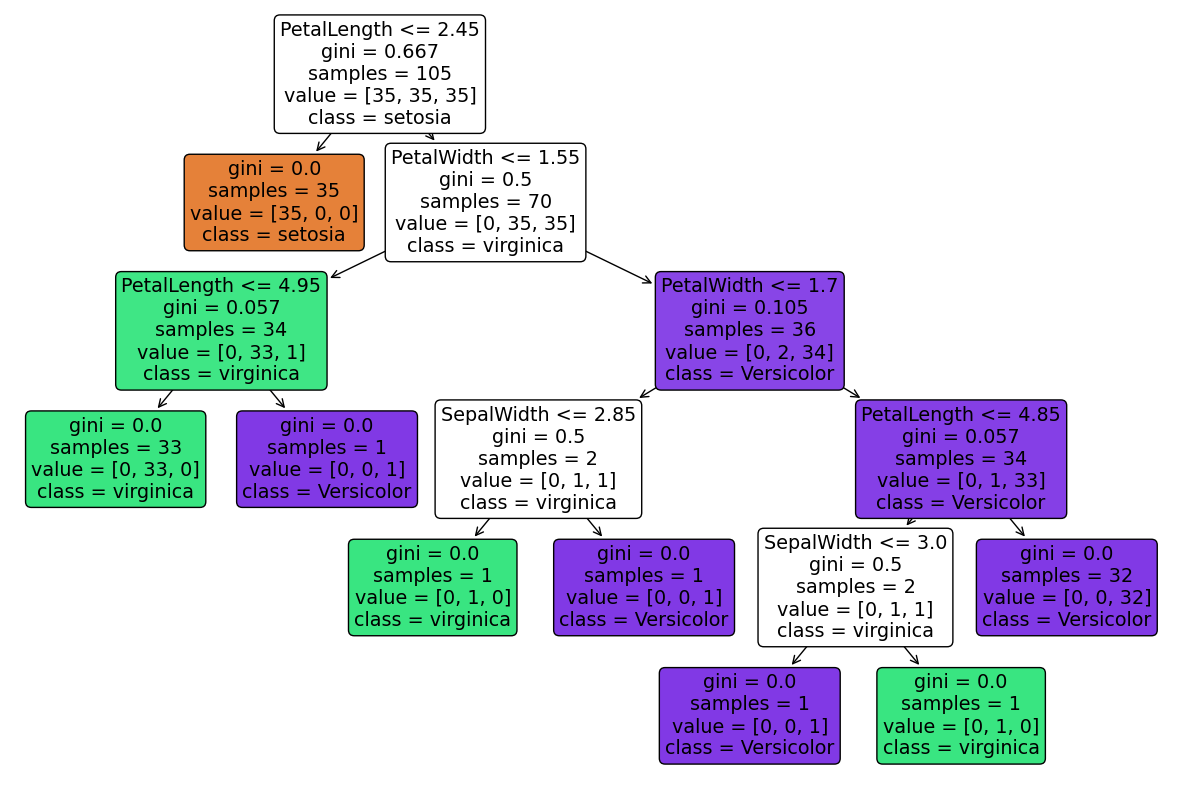

0.9333333333333333


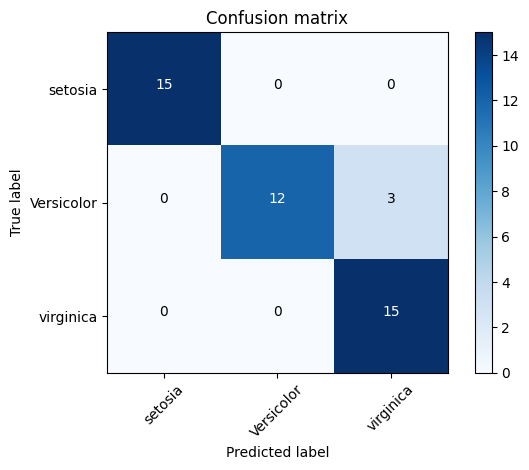

In [353]:
# load the iris dataset
# from sklearn.datasets import load_iris
# iris = load_iris(as_frame=True)
# iris = iris['frame']

iris = pd.read_csv('iris.csv')
# display(iris.head())

# display(iris.head())

X = iris.iloc[:, :-1]
# display(X.head())

y = iris.iloc[:, -1]
# display(y.head())

# create a train/test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3,random_state= 42, stratify= y) 

# learn a decision tree
dt = DecisionTreeClassifier(random_state= 42)
dt.fit(X_train,y_train)

# visualise it
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=['setosia','virginica','Versicolor'], filled=True, rounded=True)
plt.show()

# evaluate it
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)


# confusion matrix of decisob tree

conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes = ['setosia','Versicolor','virginica'])

#### 3.2.2 Try a k-nearest-neighbor classifier on the problem. Does it perform better?

Accuracy of KNN model:  0.9555555555555556


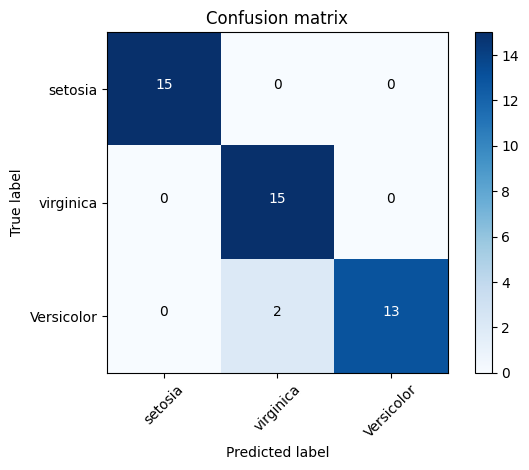

In [354]:
# learn KNN classifiers for different values of K and compare their accuracy
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy of KNN model: ",accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
plot_confusion_matrix(conf_matrix, classes = ['setosia','virginica','Versicolor'])

# print(X.shape)
# print(X_train.shape)
# print(X_test.shape)
# print(y_test.value_counts())

### 3.3 More Classification
#### 3.3.1 Compare kNN and Decision Tree using the “Weighting” dataset.

The value of K with maximum accuracy is:   7
Max accuracy is:  0.9266666666666666


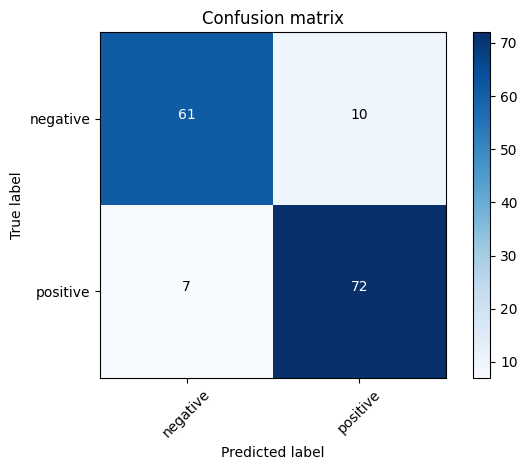

In [357]:
# load the weighting dataset 
weight  = pd.read_csv('weighting.csv')
# display(weight.head())
# print(weight.shape)

X = weight.iloc[:,:-1]
y = weight.iloc[:,-1]

# print(y.value_counts())

y = label_encoder.fit_transform(y)
# print(y)

# create a train/test split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42, stratify= y)

# print(X_train.shape)
# print(X_test.shape)

# learn KNN classifiers for different values of K and compare them to a decision tree classifier

knn_accuracy = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    knn_accuracy.append(accuracy)

max_accuracy = max(knn_accuracy)
knn_accuracy_index = knn_accuracy.index(max(knn_accuracy))
best_k= range(2,10)[knn_accuracy_index]

print("The value of K with maximum accuracy is:  ", best_k)
print("Max accuracy is: ", max_accuracy)

# confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix 
plot_confusion_matrix(conf_matrix, classes = ['negative','positive'])



Increasing the value of k in a k-NN (k-Nearest Neighbors) classifier has several implications:

1. **Smoothing Effect**: Larger values of k lead to a smoother decision boundary. This can help reduce the impact of noise in the data and make the model less sensitive to individual data points.

2. **Increased Computational Complexity**: As k increases, the computational complexity of predicting new instances also increases since the algorithm needs to consider more neighbors. This can result in slower predictions, especially when dealing with large datasets.

3. **Potential Loss of Local Patterns**: A larger k might cause the model to consider points that are farther away from the query point. This can lead to the loss of local patterns in the data, especially if the dataset has complex and non-linear structures.

4. **Underfitting**: If the value of k is too large, the model might become too generalized, leading to underfitting. The model may fail to capture the underlying patterns in the data and perform poorly on both training and test sets.

5. **Loss of Discriminative Power**: Very large values of k may result in a classifier that is not discriminative enough, as it considers a large number of neighbors, potentially from different classes, which can dilute the class-specific information.

It's essential to strike a balance when choosing the value of k. This choice often involves experimentation and validation on a separate test set to ensure the model generalizes well to new, unseen data. A common approach is to perform cross-validation for different values of k and choose the one that provides the best balance between bias and variance.

0.8866666666666667


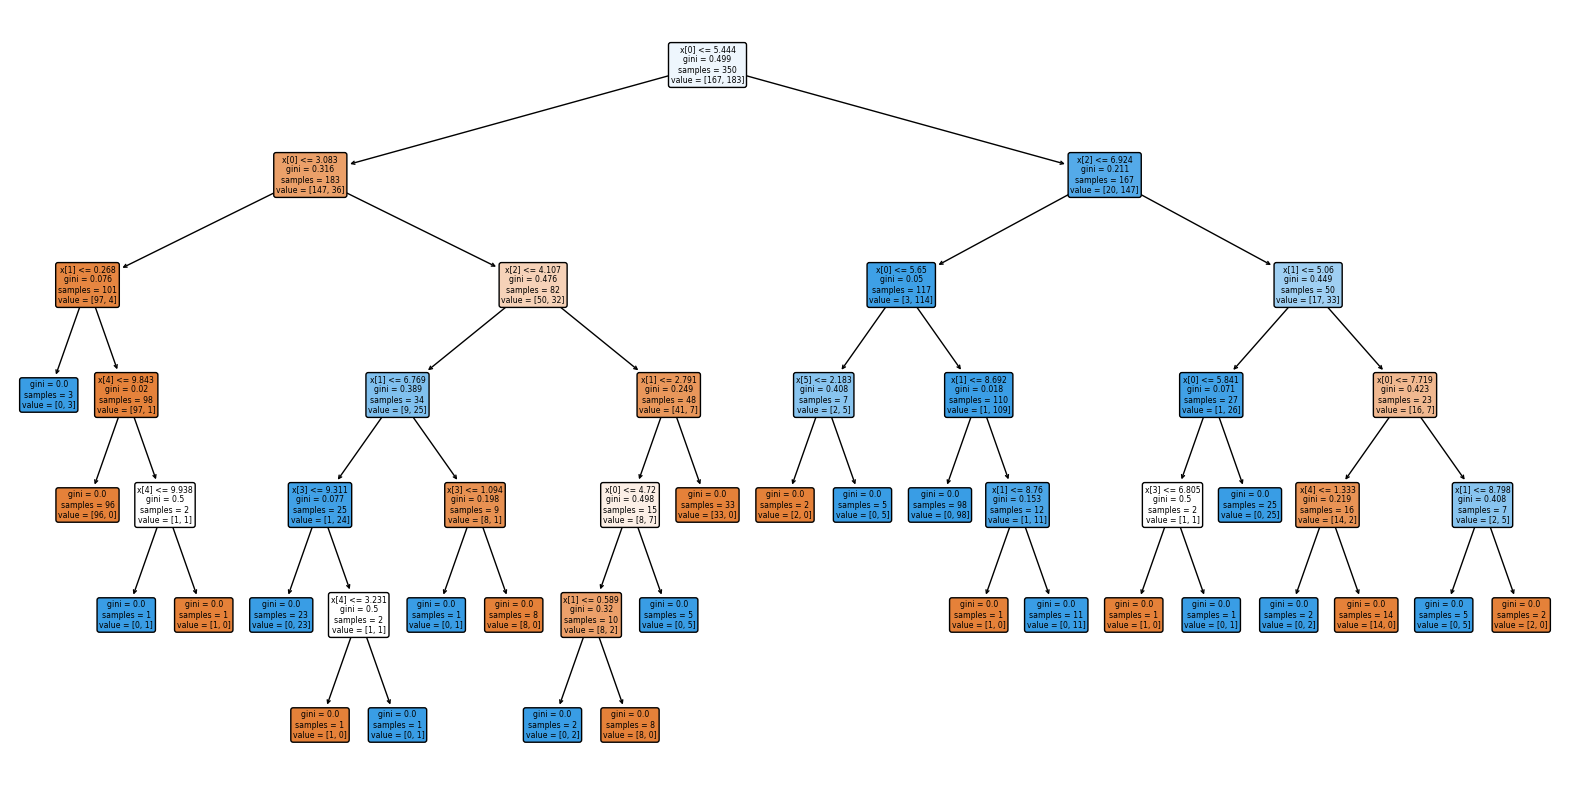

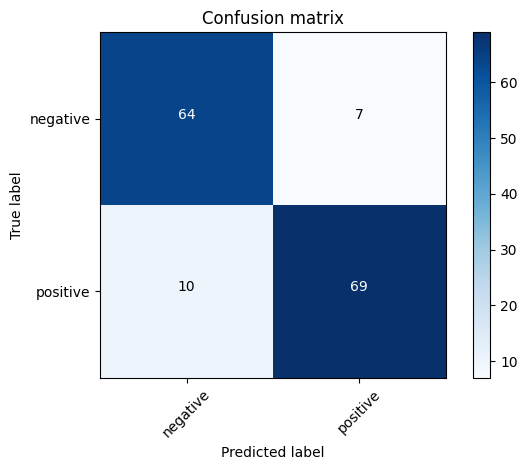

In [358]:
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(dt_accuracy)

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled = True, rounded = True)
plt.show()

# confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix 
plot_confusion_matrix(conf_matrix, classes = ['negative','positive'])